In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("bank-full.csv", delimiter=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Features

In [3]:
# genearte list of features
features = """
age,
job,
marital,
education,
balance,
housing,
contact,
day,
month,
duration,
campaign,
pdays,
previous,
poutcome,
y
"""
# Split the content by commas and newlines, and strip any extra whitespace
features = [field.strip() for field in features.split(',') if field.strip()]


In [4]:
df2 = df[features]
df2.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


### Missing values

In [5]:
df2.count()

age          45211
job          45211
marital      45211
education    45211
balance      45211
housing      45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column education?

- unknown
- primary
- secondary
- tertiary


In [6]:
df2["education"].mode()

0    secondary
Name: education, dtype: object

### Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

    age and balance
    day and campaign
    day and pdays
    pdays and previous


In [7]:
corr_mat = df2.select_dtypes(include = np.number).corr()
corr_mat 

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

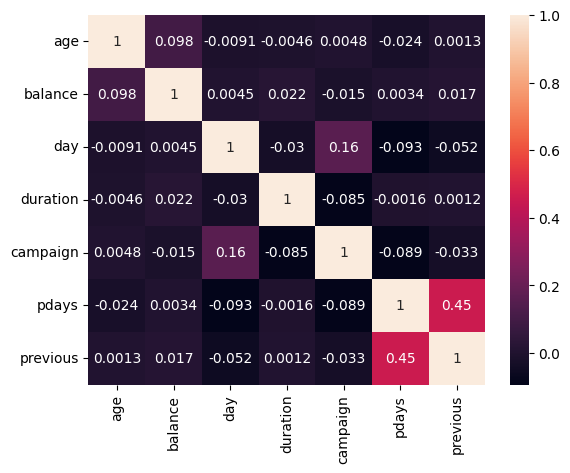

In [8]:
import seaborn as sns
sns.heatmap(corr_mat, annot=True)

### Target encoding

- Now we want to encode the y variable.
- Let's replace the values yes/no with 1/0.

In [9]:
df2["y"].value_counts()  #-> imbalanced data

y
no     39922
yes     5289
Name: count, dtype: int64

In [10]:
df2['y'] = df2['y'].map({'yes': 1, 'no': 0})


C:\Users\admr360g\AppData\Local\Temp\ipykernel_3780\2396942410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] = df2['y'].map({'yes': 1, 'no': 0})


### Split the data

    Split your data in train/val/test sets with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value y is not in your dataframe.

In [11]:
from sklearn.model_selection import train_test_split
# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(df2.drop(columns="y"), df2["y"], test_size=0.4, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Question 3

    Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
    Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

    contact
    education
    housing
    poutcome


In [12]:
X_train.shape, y_train.shape

((27126, 14), (27126,))

In [13]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

In [14]:
from IPython.display import display
from sklearn.metrics import mutual_info_score

X_categorical = X_train.select_dtypes(include = "object")

m_scores = X_categorical.apply(calculate_mi)


In [15]:
m_scores.sort_values(ascending=False)

poutcome     0.029403
month        0.024780
contact      0.014214
housing      0.009464
job          0.007910
education    0.002570
marital      0.002201
dtype: float64

### Question 4 

    Now let's train a logistic regression.
    Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
    Fit the model on the training dataset.
        To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

    0.6
    0.7
    0.8
    0.9


In [16]:
from sklearn.feature_extraction import DictVectorizer

train_dict = X_train.select_dtypes(include=["object", np.number]).to_dict(orient='records')
val_dict = pd.DataFrame(X_val).select_dtypes(include=["object", np.number]).to_dict(orient='records')


dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

dv.fit(val_dict)
X_val = dv.transform(val_dict)



In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict_proba(X_val)[:, 1]



In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred > 0.5)
accuracy

0.9007962840079629

### Question 5

    Let's find the least useful feature using the feature elimination technique.
    Train a model with all these features (using the same parameters as in Q4).
    Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
    For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

    age
    balance
    marital
    previous

    Note: The difference doesn't have to be positive.


In [65]:
from sklearn.model_selection import train_test_split
# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(df2.drop(columns="y"), df2["y"], test_size=0.4, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_val = pd.DataFrame(X_val, columns=X_train.columns)
features = X_train.columns
features

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [72]:
len(features)

14

In [67]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression



# create list of features
train_dcts, val_dcts = {}, {}
for feat in features:
    
    X_train2 = X_train.drop(columns=feat)
    train_dict = X_train2.select_dtypes(include=["object", np.number]).to_dict(orient='records')
    val_dict = X_val.drop(columns=feat).select_dtypes(include=["object", np.number]).to_dict(orient='records')
    
    train_dcts[feat] = train_dict
    val_dcts[feat] = val_dict



In [68]:
fe_accuracies = []
for k in train_dcts.keys():
    train_dict = train_dcts[k]
    val_dict = val_dcts[k]

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train2 = dv.transform(train_dict)

    dv = DictVectorizer(sparse=False)
    dv.fit(val_dict)
    X_val = dv.transform(val_dict)


    lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    lr.fit(X_train2, y_train)

    y_pred = lr.predict_proba(X_val)[:, 1]
    fe_accuracies.append(accuracy_score(y_val, y_pred > 0.5))

In [75]:
fe_accuracies_df = pd.DataFrame({"feature": features, "accuracy": fe_accuracies})
fe_accuracies_df["Delta_acc"] = abs(accuracy - fe_accuracies_df["accuracy"])
fe_accuracies_df.sort_values(by="Delta_acc", ascending=True)


,feature,accuracy,Delta_acc
4,balance,0.900796,0.000000
8,month,0.900907,0.000111
11,pdays,0.900686,0.000111
2,marital,0.901017,0.000221
3,education,0.900575,0.000221
7,day,0.901017,0.000221
0,age,0.900354,0.000442
10,campaign,0.900354,0.000442
1,job,0.900133,0.000664
12,previous,0.899912,0.000885


### Question 6

    Now let's train a regularized logistic regression.
    Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
    Train models using all the features as in Q4.
    Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

    0.01
    0.1
    1
    10
    100

    Note: If there are multiple options, select the smallest C.


In [80]:


from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


C = [0.01, 0.1, 1, 10, 100]

from sklearn.model_selection import train_test_split
# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(df2.drop(columns="y"), df2["y"], test_size=0.4, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_val = pd.DataFrame(X_val, columns=X_train.columns)

train_dict = X_train.select_dtypes(include=["object", np.number]).to_dict(orient='records')
val_dict = pd.DataFrame(X_val).select_dtypes(include=["object", np.number]).to_dict(orient='records')


dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

dv.fit(val_dict)
X_val = dv.transform(val_dict)

for c in C:
    lr = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)

    y_pred = lr.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_pred > 0.5)
    print(f"C = {c}, accuracy = {accuracy:.3}")



C = 0.01, accuracy = 0.899
C = 0.1, accuracy = 0.901
C = 1, accuracy = 0.901
C = 10, accuracy = 0.9
C = 100, accuracy = 0.901
